Machine learning project on credit Loan dataset

In the following project.I have tried to predict if a person would get a credit loan on some personal pararmeters that include information about the person 

The project flow is as follows

* Importing data
    1.Downloading data from kaggle kaggle and saving it.
    2.Importing data as a pandas data frame
* Cleaning data
    1.Removing missing values
    2.Removing duplicate values
    3.Selecting only required colums for project
* EDA
   1.Correlation Chart
* Pre-Processing the data 
    1.Encoding the categorical columns
    2.Scaling the numerical columns
    3.Train Validation split
* Creating Models
  1.Model 1 (Random Forest Regressor)
      .Creating the base model and fitting the data 
      .Getting the important columns
      .Hyperparameter Tuning (Grid Search CV)
      .Getting best estimitors and Getting best Score
      .Creating the best model
      .Getting the best model score
      .Predicition on validation set

Importing Numpy and Pandas

In [18]:
import pandas as pd
import numpy as np

Reading csv data file to pandas dataframe

In [19]:
df=pd.read_csv('application_data.csv')

In [20]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df.shape

(307511, 122)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [23]:
df=df.iloc[:,1:16]

In [24]:
df.shape

(307511, 15)

In [25]:
df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE'],
      dtype='object')

In [26]:
df.corr()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
TARGET,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645
CNT_CHILDREN,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827
AMT_INCOME_TOTAL,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610
AMT_CREDIT,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968
AMT_ANNUITY,-0.012817,0.021374,0.191657,0.770138,1.000000,0.775109
AMT_GOODS_PRICE,-0.039645,-0.001827,0.159610,0.986968,0.775109,1.000000


In [27]:
df.dtypes

TARGET                   int64
NAME_CONTRACT_TYPE      object
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_ANNUITY            float64
AMT_GOODS_PRICE        float64
NAME_TYPE_SUITE         object
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
dtype: object

In [28]:
df.isnull().sum()

TARGET                    0
NAME_CONTRACT_TYPE        0
CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
CNT_CHILDREN              0
AMT_INCOME_TOTAL          0
AMT_CREDIT                0
AMT_ANNUITY              12
AMT_GOODS_PRICE         278
NAME_TYPE_SUITE        1292
NAME_INCOME_TYPE          0
NAME_EDUCATION_TYPE       0
NAME_FAMILY_STATUS        0
NAME_HOUSING_TYPE         0
dtype: int64

In [29]:
df=df.dropna()

In [30]:
df.isnull().sum()

TARGET                 0
NAME_CONTRACT_TYPE     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_ANNUITY            0
AMT_GOODS_PRICE        0
NAME_TYPE_SUITE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
dtype: int64

In [31]:
df.shape

(306207, 15)

In [32]:
df.duplicated().sum()

12567

In [33]:
df=df.drop_duplicates()

In [34]:
df.shape

(293640, 15)

EDA

Getting the correlation chart of features in our data 


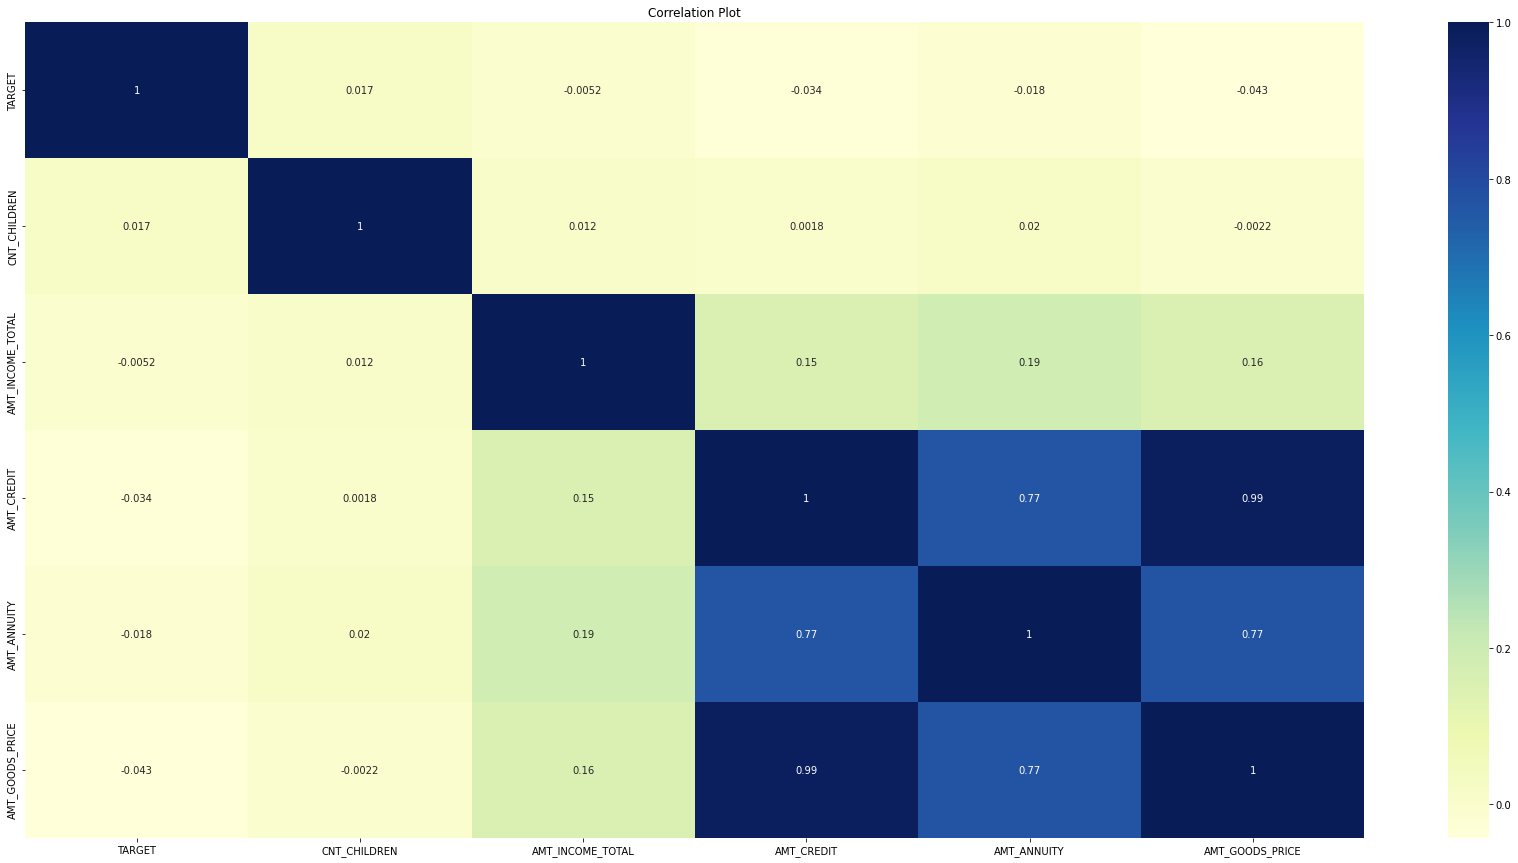

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (30,15))

plt.title('Correlation Plot')
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu') 
plt.show();


Pre processing the data 

Getting all the categorical values and the unique values in them

In [37]:
c_cols=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']
for i in c_cols:
    print(df[i].unique())

['Cash loans' 'Revolving loans']
['M' 'F' 'XNA']
['N' 'Y']
['Y' 'N']
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated']
['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']


In [38]:
df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE'],
      dtype='object')

In [39]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit_transform(df[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']])

array([[0., 1., 0., ..., 4., 3., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [1., 1., 1., ..., 4., 3., 1.],
       ...,
       [0., 0., 0., ..., 1., 2., 1.],
       [0., 0., 0., ..., 4., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [40]:
df[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']]=enc.fit_transform(df[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']])

In [41]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
0,1,0.0,1.0,0.0,1.0,0,202500.0,406597.5,24700.5,351000.0,6.0,7.0,4.0,3.0,1.0
1,0,0.0,0.0,0.0,0.0,0,270000.0,1293502.5,35698.5,1129500.0,1.0,4.0,1.0,1.0,1.0
2,0,1.0,1.0,1.0,1.0,0,67500.0,135000.0,6750.0,135000.0,6.0,7.0,4.0,3.0,1.0
3,0,0.0,0.0,0.0,1.0,0,135000.0,312682.5,29686.5,297000.0,6.0,7.0,4.0,0.0,1.0
4,0,0.0,1.0,0.0,1.0,0,121500.0,513000.0,21865.5,513000.0,6.0,7.0,4.0,3.0,1.0


In [42]:
n_cols=['CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(df[n_cols])

In [44]:
df[n_cols]=scaler.transform(df[n_cols])

In [45]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
0,1,0.0,1.0,0.0,1.0,0.0,0.001512,0.090287,0.090032,0.077441,6.0,7.0,4.0,3.0,1.0
1,0,0.0,0.0,0.0,0.0,0.0,0.002089,0.311736,0.132924,0.271605,1.0,4.0,1.0,1.0,1.0
2,0,1.0,1.0,1.0,1.0,0.0,0.000358,0.022472,0.020025,0.023569,6.0,7.0,4.0,3.0,1.0
3,0,0.0,0.0,0.0,1.0,0.0,0.000935,0.066837,0.109477,0.063973,6.0,7.0,4.0,0.0,1.0
4,0,0.0,1.0,0.0,1.0,0.0,0.000819,0.116854,0.078975,0.117845,6.0,7.0,4.0,3.0,1.0


In [46]:
X=df.iloc[:,1:]
y=df['TARGET']

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .2, random_state = 42)

### Model 1

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

In [49]:
model_1=RandomForestClassifier(random_state=42, n_jobs=-1)
model_1.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [50]:
t_pred1=model_1.predict(X_train)
v_pred1=model_1.predict(X_val)

In [51]:
model_1.score(X_train,y_train)

0.99598998774009

In [52]:
model_1.score(X_val,y_val)

0.9099918267266041

In [53]:
tl1=mean_squared_error(t_pred1,y_train)
vl1=mean_squared_error(y_val,v_pred1)
print(f"The rmse error for training data is {tl1}")
print(f"The rmse error for validation data is {vl1}")

The rmse error for training data is 0.004010012259910094
The rmse error for validation data is 0.090008173273396


Important Featureses ranking Of dataset

<AxesSubplot:xlabel='importance', ylabel='feature'>

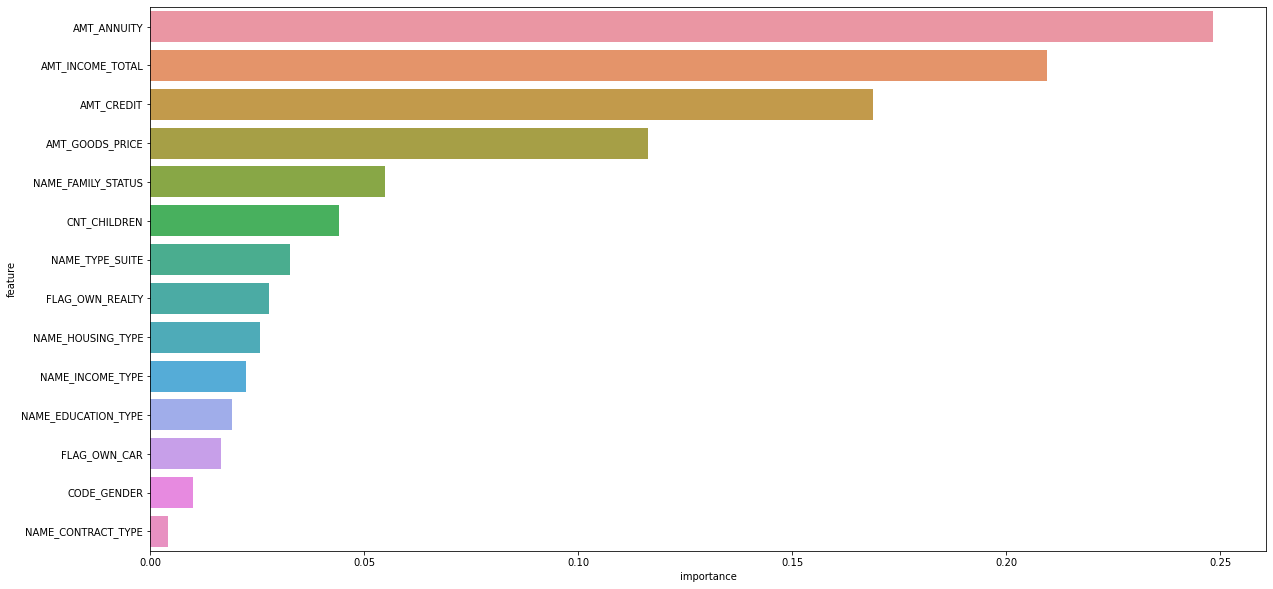

In [54]:
model_1_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance':model_1.feature_importances_
}).sort_values('importance', ascending=False)
plt.figure(figsize = (20,10))
sns.barplot(data=model_1_importance_df, x='importance', y='feature')


Hyperparameter Tuning of Model 1 using (GridSearchCV)

In [55]:
from sklearn.model_selection import GridSearchCV
parameters = {'class_weight': [{0: 1, 1: v} for v in range (1,4)]
}
grid_model_1 = GridSearchCV(estimator = model_1,param_grid = parameters)


In [56]:
grid_model_1.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}]})

In [57]:
grid_model_1.best_params_

{'class_weight': {0: 1, 1: 2}}

Best model fitting and geting the score of the best Model

In [58]:
best_model_1=RandomForestClassifier(class_weight={0: 1, 1: 2})
best_model_1.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 2})

In [59]:
best_model_1.score(X_train,y_train)

0.9960112723062253

In [60]:
best_model_1.score(X_val,y_val)

0.9098045225446124